In [1]:
import pandas as pd

In [2]:
BASE_UNLABELLED = 'C:\\Users\\basharm\\PythonJupyter\\CoVID19CodeGit\\data\\australian_space\\'
BASE_UNLABELLED

'C:\\Users\\basharm\\PythonJupyter\\CoVID19CodeGit\\data\\australian_space\\'

In [3]:
df_in = pd.read_csv(BASE_UNLABELLED+'au_tweet_sentiment.csv', encoding='utf8')

In [4]:
df_in.head()

,Text,Time,Location,Name,Sentiment
0,bat sever human cell,2019-11-27 18:52:31,Australia,batpapers,1
1,virologist learn spread year later infect peni...,2019-12-05 19:55:24,NaN,tgk3130,0
2,remind flu flu think flu actual cold late,2019-12-09 06:21:20,Australia,DidiFrench,0
3,outbreak news east,2019-12-26 18:20:06,NaN,katrinamurphyir,0
4,detect sort known patient case time winter,2019-12-31 21:35:02,Australia,MackayIM,1


In [5]:
df_in['Time'] =pd.to_datetime(df_in['Time'])

In [6]:
df_in['DinY'] = df_in['Time'].dt.dayofyear + (df_in['Time'].dt.year-2019)*365
df_in.head()

,Text,Time,Location,Name,Sentiment,DinY
0,bat sever human cell,2019-11-27 18:52:31,Australia,batpapers,1,331.0
1,virologist learn spread year later infect peni...,2019-12-05 19:55:24,NaN,tgk3130,0,339.0
2,remind flu flu think flu actual cold late,2019-12-09 06:21:20,Australia,DidiFrench,0,343.0
3,outbreak news east,2019-12-26 18:20:06,NaN,katrinamurphyir,0,360.0
4,detect sort known patient case time winter,2019-12-31 21:35:02,Australia,MackayIM,1,365.0


In [ ]:
#df_in['Time'].dt.dayofyear + (df_in['Time'].dt.year-2019)*365

In [7]:
df_in['WinY'] = df_in['Time'].dt.week + (df_in['Time'].dt.year-2019)*52
df_in.head(10)

,Text,Time,Location,Name,Sentiment,DinY,WinY
0,bat sever human cell,2019-11-27 18:52:31,Australia,batpapers,1,331.0,48.0
1,virologist learn spread year later infect peni...,2019-12-05 19:55:24,NaN,tgk3130,0,339.0,49.0
2,remind flu flu think flu actual cold late,2019-12-09 06:21:20,Australia,DidiFrench,0,343.0,50.0
3,outbreak news east,2019-12-26 18:20:06,NaN,katrinamurphyir,0,360.0,52.0
4,detect sort known patient case time winter,2019-12-31 21:35:02,Australia,MackayIM,1,365.0,1.0
5,east viral novel east wa,2020-01-01 06:58:55,Saudi,Da5eel,1,366.0,53.0
6,wait news china talk social media sever ill pa...,2020-01-01 11:07:07,Australia,MackayIM,1,366.0,53.0
7,purport lab report share medic detect result h...,2020-01-01 15:18:56,NaN,alexandraphelan,0,366.0,53.0
8,comment genet segment wa detect corona,2020-01-01 21:05:03,Australia,MackayIM,1,366.0,53.0
9,hong level pneumonia outbreak word sar era aw ...,2020-01-05 05:05:36,Australia,drng,0,370.0,53.0


In [8]:
df_in['MinY'] = df_in['Time'].dt.month + (df_in['Time'].dt.year-2019)*12
df_in.head(10)

,Text,Time,Location,Name,Sentiment,DinY,WinY,MinY
0,bat sever human cell,2019-11-27 18:52:31,Australia,batpapers,1,331.0,48.0,11.0
1,virologist learn spread year later infect peni...,2019-12-05 19:55:24,NaN,tgk3130,0,339.0,49.0,12.0
2,remind flu flu think flu actual cold late,2019-12-09 06:21:20,Australia,DidiFrench,0,343.0,50.0,12.0
3,outbreak news east,2019-12-26 18:20:06,NaN,katrinamurphyir,0,360.0,52.0,12.0
4,detect sort known patient case time winter,2019-12-31 21:35:02,Australia,MackayIM,1,365.0,1.0,12.0
5,east viral novel east wa,2020-01-01 06:58:55,Saudi,Da5eel,1,366.0,53.0,13.0
6,wait news china talk social media sever ill pa...,2020-01-01 11:07:07,Australia,MackayIM,1,366.0,53.0,13.0
7,purport lab report share medic detect result h...,2020-01-01 15:18:56,NaN,alexandraphelan,0,366.0,53.0,13.0
8,comment genet segment wa detect corona,2020-01-01 21:05:03,Australia,MackayIM,1,366.0,53.0,13.0
9,hong level pneumonia outbreak word sar era aw ...,2020-01-05 05:05:36,Australia,drng,0,370.0,53.0,13.0


In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df_in = df_in.drop(df_in[df_in['DinY'].isna()].index)

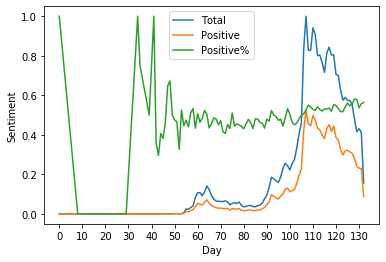

In [26]:
tempo = 'DinY'
sizes = df_in.groupby(tempo).Sentiment.size()
maxi = max(sizes)
plt.plot(df_in.groupby(tempo).Sentiment.size()/maxi)
plt.plot(df_in.groupby(tempo).Sentiment.sum()/maxi)
plt.plot(df_in.groupby(tempo).Sentiment.sum()/sizes)
plt.xticks(np.arange(331, 463, 10), [x*10 for x in range(140)])
plt.ylabel('Sentiment')
plt.xlabel('Day')
plt.legend(['Total', 'Positive', 'Positive%'])
plt.show()

In [28]:
df_in = df_in.drop(df_in[df_in['WinY']==1.0].index)

In [35]:
set(df_in.WinY)

{48.0,
 49.0,
 50.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0}

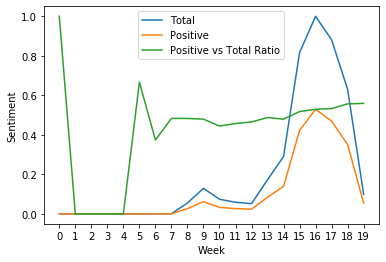

In [38]:
tempo = 'WinY'
sizes = df_in.groupby(tempo).Sentiment.size()
maxi = max(sizes)
plt.plot(df_in.groupby(tempo).Sentiment.size()/maxi)
plt.plot(df_in.groupby(tempo).Sentiment.sum()/maxi)
plt.plot(df_in.groupby(tempo).Sentiment.sum()/sizes)
plt.xticks(np.arange(48, 68, 1), [x for x in range(20)])
plt.ylabel('Sentiment')
plt.xlabel('Week')
plt.legend(['Total', 'Positive', 'Positive vs Total Ratio'])
plt.show()

In [ ]:
df_in.drop( df_in[df_in['WinY'] == 1].index , inplace=True)

In [ ]:
tempo = 'MinY'
sizes = df_in.groupby(tempo).Sentiment.size()
maxi = max(sizes)
plt.plot(df_in.groupby(tempo).Sentiment.size()/maxi)
plt.plot(df_in.groupby(tempo).Sentiment.sum()/maxi)
plt.plot(df_in.groupby(tempo).Sentiment.sum()/sizes)
plt.ylabel('Sentiment')
plt.xlabel('Month')
plt.legend(['Total', 'Positive', 'Positive%'])
plt.show()

In [ ]:
df_in[(df_in['MinY']>12) & (df_in['MinY']<14)]

In [ ]:
df_in2 = df_in.drop( df_in[df_in['Location'].isna() ].index)
df_in2.head(10)

In [ ]:
locs = [loc.lower() for loc in list(df_in2['Location'])]

In [ ]:
loc2nic = {'australia':'au',
           'oceania':'au',
           'oz':'au',
           'australian capital territory':'act',
           'new south wales':'nsw',
           'northern territory':'nt',
           'queensland':'qld',
           'south australia':'sa',
           'tasmania':'tas',
           'victoria':'vic',
           'victoria.':'vic',
           'western australia':'wa',
           'sydney':'syd',
           'brisbane':'bne',
           'adelaide':'ald',
           'hobart':'ymhb',
           'melbourne':'mel',
           'perth':'per',
           'canberra':'can'}

In [ ]:
for i, loc in enumerate(locs):
    if loc in loc2nic.keys():
        locs[i] = loc2nic[loc]

In [ ]:
for i, loc in enumerate(locs):
    if loc not in loc2nic.values():
        locs[i] = 'oth'

In [ ]:
set(locs)

In [ ]:
df_in2['Location'] = locs

In [ ]:
loc2frq = {}
for loc in locs:
    if loc in loc2frq.keys():
        loc2frq[loc] += 1
    else:
        loc2frq[loc] = 1
#loc2id

In [ ]:
loc2frq = {k:v for k,v in sorted(loc2frq.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
loc2frq

In [ ]:
df_in2.head()

In [ ]:
# plt.plot((df_in2.groupby('Location').Sentiment.sum()/df_in2.groupby('Location').Sentiment.size()))
# plt.ylabel('sentiment')
# plt.xlabel('Space')
# plt.show()


tempo = 'Location'
sizes = df_in2.groupby(tempo).Sentiment.size()
maxi = max(sizes)
plt.bar(list(set(locs)), df_in2.groupby(tempo).Sentiment.size()/maxi)
#plt.bar(list(set(locs)), df_in2.groupby(tempo).Sentiment.sum()/maxi)
#plt.bar(list(set(locs)), df_in2.groupby(tempo).Sentiment.sum()/sizes)
plt.ylabel('Sentiment')
plt.xlabel('Space')
#plt.legend(['Total', 'Positive', 'Positive%'])
plt.legend(['Total'])
plt.show()

In [ ]:
# plt.plot((df_in2.groupby('Location').Sentiment.sum()/df_in2.groupby('Location').Sentiment.size()))
# plt.ylabel('sentiment')
# plt.xlabel('Space')
# plt.show()


tempo = 'Location'
sizes = df_in2.groupby(tempo).Sentiment.size()
maxi = max(sizes)
#plt.bar(list(set(locs)), df_in2.groupby(tempo).Sentiment.size()/maxi)
plt.bar(list(set(locs)), df_in2.groupby(tempo).Sentiment.sum()/maxi)
#plt.bar(list(set(locs)), df_in2.groupby(tempo).Sentiment.sum()/sizes)
plt.ylabel('Sentiment')
plt.xlabel('Space')
#plt.legend(['Total', 'Positive', 'Positive%'])
plt.legend(['Positive'])
plt.show()

In [ ]:
# plt.plot((df_in2.groupby('Location').Sentiment.sum()/df_in2.groupby('Location').Sentiment.size()))
# plt.ylabel('sentiment')
# plt.xlabel('Space')
# plt.show()


tempo = 'Location'
sizes = df_in2.groupby(tempo).Sentiment.size()
maxi = max(sizes)
plt.ylim((0, 1))
#plt.bar(list(set(locs)), df_in2.groupby(tempo).Sentiment.size()/maxi)
#plt.bar(list(set(locs)), df_in2.groupby(tempo).Sentiment.sum()/maxi)
plt.bar(list(set(locs)), df_in2.groupby(tempo).Sentiment.sum()/sizes)
plt.ylabel('Sentiment')
plt.xlabel('Space')
#plt.legend(['Total', 'Positive', 'Positive%'])
plt.legend(['Positive%'])
plt.grid()
plt.show()

In [ ]:
tempo = 'Location'
sizes = df_in2.groupby(tempo).Sentiment.size()
maxi = max(sizes)
plt.scatter(list(set(locs)), df_in2.groupby(tempo).Sentiment.size()/maxi)
plt.scatter(list(set(locs)), df_in2.groupby(tempo).Sentiment.sum()/maxi)
#plt.scatter(list(set(locs)), df_in2.groupby(tempo).Sentiment.sum()/sizes)
plt.ylabel('Sentiment')
plt.xlabel('Space')
plt.legend(['Total', 'Positive', 'Positive%'])
plt.show()

In [ ]:
XYZ = df_in2.groupby(['WinY', 'Location']).Sentiment.sum()
XYZ

In [ ]:
XYZ.get((48,  'au'))

In [ ]:
time = []
locations = []
for key in XYZ.keys():
    time.append(key[0])
    locations.append(key[1])
time[:5], locations[:5]

In [ ]:
# sentiments = list(XYZ.values)
# sentiments[:10]

In [ ]:
loc2id = {}
id2loc = list(set(locations))
for i,loc in enumerate(id2loc):
    loc2id[loc] = i

In [ ]:
for idx, loc in enumerate(locations):
    locations[idx] = loc2id[loc]

In [ ]:
locations[:10]

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
X, Y = np.meshgrid(time, locations)

In [ ]:
Y

In [ ]:
loc2id

In [ ]:
def z_function(X, Y):
    Z = []
    for i in range(len(X)):
        z = []
        for j in range(len(X[i])):
            val = XYZ.get((X[i][j],  id2loc[Y[i][j]]))
            if val:
                z.append(val)
            else:
                z.append(0)
        Z.append(z)
    return Z

In [ ]:
Z = z_function(X, Y)

In [ ]:
Z1 = np.array(Z)

In [ ]:
Z1

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_xlabel('Time')
ax.set_ylabel('Location')
ax.set_zlabel('Sentiment')
ax.set_title('Sentiment distribution over time and space');

In [ ]:
xpos = X.flatten()
ypos = Y.flatten()

In [ ]:
ypos

In [ ]:
set(ypos)

In [ ]:
Z1

In [ ]:
lx= len(Z1[0])  # Work out matrix dimensions
ly= len(Z1[:,0])

In [ ]:
zpos = np.zeros(lx*ly) # position in z direction
zpos

In [ ]:
dx = np.ones_like(zpos)# diameter of x (i.e. size of the bar in x direction)
dy = dx.copy() # diameter of y 
dz = Z1.flatten() # diameter of z

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)

ax.bar3d(xpos,ypos,zpos, dx, dy, dz)

#sh()
#ax.w_xaxis.set_ticklabels(column_names)
ax.w_yaxis.set_ticklabels(id2loc)
ax.set_xlabel('Week')
ax.set_ylabel('Location')
ax.set_zlabel('Sentiment')

plt.show()

In [ ]:
# ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z1, rstride=10, cstride=10,
#                 cmap='winter', edgecolor='none')
# ax.set_title('Sentiment distribution over time and space');

In [ ]:
# ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z1, rstride=1, cstride=1,
#                 cmap='winter', edgecolor='none')
# ax.set_xlabel('Time')
# ax.set_ylabel('Location')
# ax.set_zlabel('Sentiment')
# ax.set_title('Sentiment distribution over time and space');